<a href="https://colab.research.google.com/github/Bell993/BankChurners/blob/main/BankChurners_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка из Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/ml_data"
%cd /content/drive/My Drive/ml_data

Mounted at /content/drive
/content/drive/My Drive/ml_data


In [ ]:
#!kaggle datasets download -d sakshigoyal7/credit-card-customers

  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 23.8MB/s]


### Introduction

This notebook goes through various statistical techniques and machine learning. Please leave comments about where I can improve and what you liked. Thanks!

# Work in Data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [23]:
df = pd.read_csv('BankChurners.csv')
df = df[df.columns[:-2]]


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Data Cleaning 

In [25]:
def run_int(df,col):
  df = df.replace(col)
  return df

In [26]:

Gender = {'M':1,'F':0}
Attrition_Flag = {'Existing Customer':1, 'Attrited Customer':0}
Income_Category = {'Less than $40K':1,'$40K - $60K':2,'$80K - $120K':4,'$60K - $80K':3,'Unknown':0,'$120K +':4}

df = run_int(df,Gender)
df = run_int(df,Attrition_Flag)
df = run_int(df,Income_Category)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [14]:
Education_Level = {'Graduate':1,'High School':2,'Uneducated':4,'College':3,'0':0,'Post-Graduate':4,'Doctorate':5}
Marital_Status = {'Married':1,'Single':2,'Divorced':3,'0':0}
Card_Category = {'Blue':1,'Silver':2,'Gold':3,'Platinum':0}

In [15]:
example = run_int(df,Education_Level)
example = run_int(example,Marital_Status)
example = run_int(example,Card_Category)
example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Feature selections


## Shapiro-Wilk 
Test for normality


p > alpha : Sample looks Gaussian

p < alpha : Sample does not look Gaussian

In [13]:
from scipy.stats import shapiro
result = df.copy()
alpha = 0.05
for col in df.columns:
  if result.dtypes[col] != np.object:
    if shapiro(result[col])[1] > alpha:
	    print('Sample looks Gaussian (fail to reject H0)')
    else:
	    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Spearman correlation 
is a method of nonparametric analysis, checking for the normality of the distribution is not required

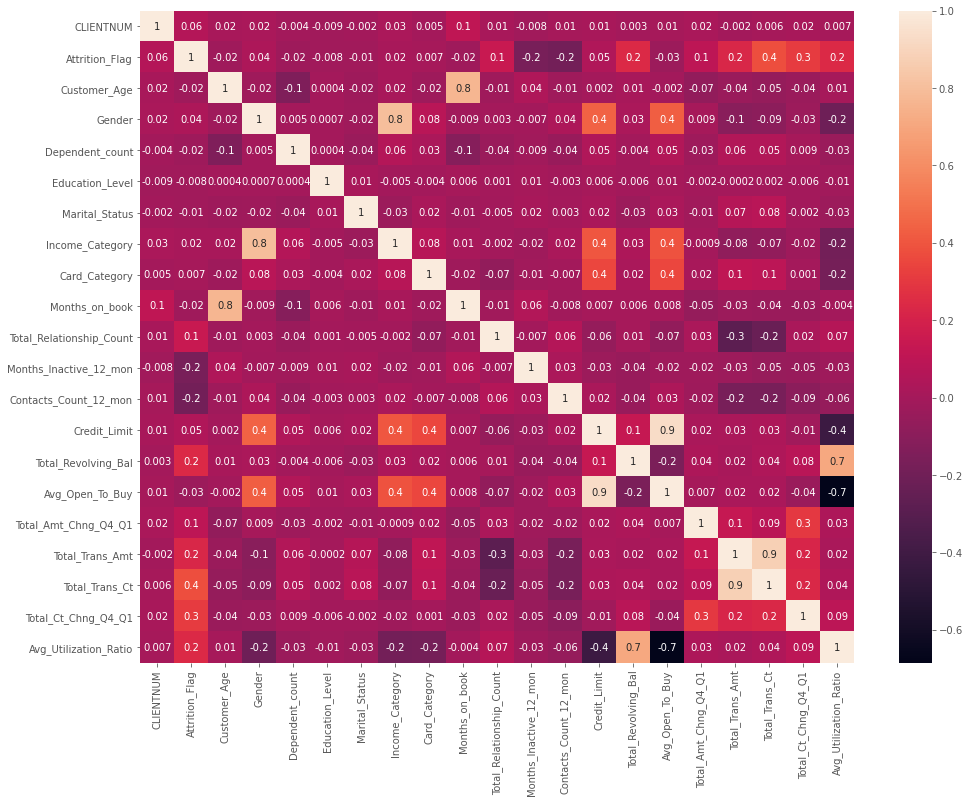

In [16]:
plt.subplots(figsize=(16,12))
sns.heatmap(example.corr(method='spearman'),annot=True,fmt='.1g')
plt.show()

# Data visualization

## Attrition_Flag

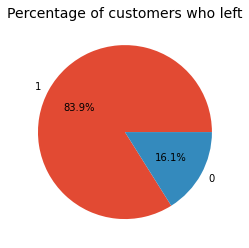

In [7]:
t = df["Attrition_Flag"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(t, labels=t.index, autopct='%1.1f%%', shadow=None)
plt.title("Percentage of customers who left", fontsize=14)
plt.show()


## Income category & Gender

Gender  Income_Category
0       1                  3284
1       4                  2262
        3                  1402
0       0                  1060
        2                  1014
1       2                   776
        1                   277
        0                    52
Name: Income_Category, dtype: int64

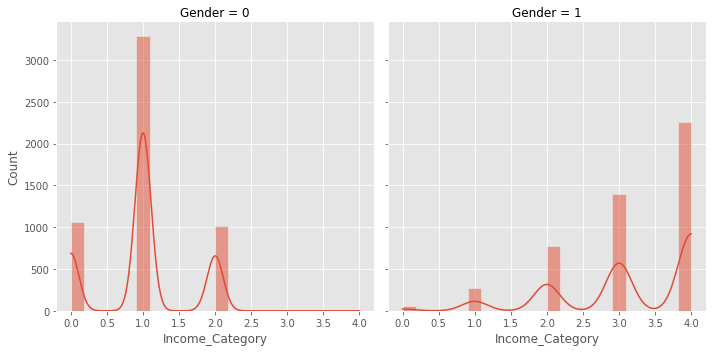

In [ ]:
sns.displot(data=df, x="Income_Category", col="Gender", kde=True)
example.groupby(['Gender'])['Income_Category'].value_counts().sort_values(ascending=False)

## Credit_limit & Age

Text(0.5, 1.0, 'Зависимость кредитного лимита от возраста')

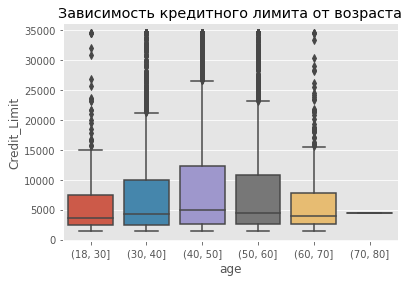

In [ ]:
df["age"] = pd.cut(df.Customer_Age, [18, 30, 40, 50, 60, 70, 80])
sns.boxplot( x = df['age'], y = df['Credit_Limit']).set_title('The dependence of the credit limit on age')

## Credit_Limit & Avg_Open_To_Buy

the data is linearly dependent

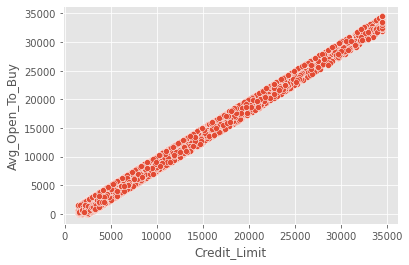

In [ ]:
sns.scatterplot(data=example, x="Credit_Limit", y="Avg_Open_To_Buy")

## Total_Trans_Amt & Total_Trans_Ct
the data is linearly dependent


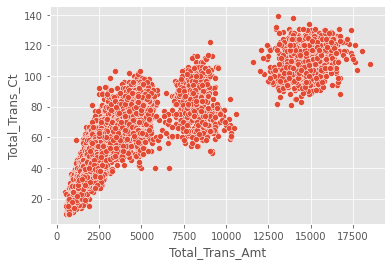

In [ ]:

sns.scatterplot(data=example, x="Total_Trans_Amt", y="Total_Trans_Ct")


## Hypotheses 
about the relationship between the Avg_Utilization_Ratio and Attrited Customer



Statistics=4320406.500, p=0.000
Different distribution (reject H0)


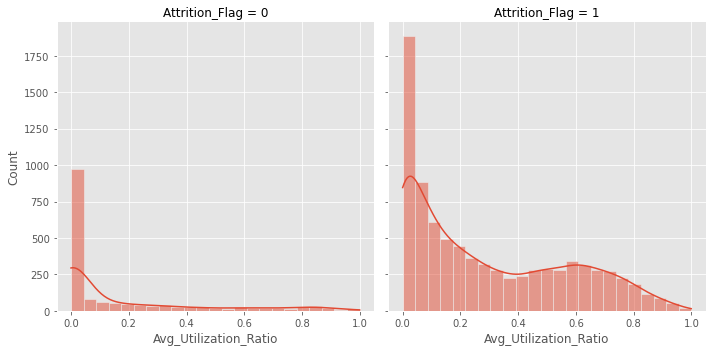

In [18]:
x = example[example['Attrition_Flag'] == 0]['Avg_Utilization_Ratio']
y = example[example['Attrition_Flag'] == 1]['Avg_Utilization_Ratio']
from scipy.stats import mannwhitneyu
coef,p = mannwhitneyu(x, y)
print('Statistics=%.3f, p=%.3f' % (coef, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution(fail to reject H0)')
else:
	print('Different distribution (reject H0)')
 
sns.displot(data=df, x="Avg_Utilization_Ratio", col="Attrition_Flag", kde=True)

# Data preprocessing

In [27]:
df = pd.get_dummies(df, columns = ['Card_Category', 'Education_Level', 'Marital_Status'])
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Education_Level_0,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_0,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,768805383,1,45,1,3,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,818770008,1,49,0,5,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,713982108,1,51,1,3,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,769911858,1,40,0,4,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,709106358,1,40,1,3,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [28]:
df.drop(columns=['Avg_Open_To_Buy','Total_Trans_Ct'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CLIENTNUM                      10127 non-null  int64  
 1   Attrition_Flag                 10127 non-null  int64  
 2   Customer_Age                   10127 non-null  int64  
 3   Gender                         10127 non-null  int64  
 4   Dependent_count                10127 non-null  int64  
 5   Income_Category                10127 non-null  int64  
 6   Months_on_book                 10127 non-null  int64  
 7   Total_Relationship_Count       10127 non-null  int64  
 8   Months_Inactive_12_mon         10127 non-null  int64  
 9   Contacts_Count_12_mon          10127 non-null  int64  
 10  Credit_Limit                   10127 non-null  float64
 11  Total_Revolving_Bal            10127 non-null  int64  
 12  Total_Amt_Chng_Q4_Q1           10127 non-null 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
class preprocessing ():
  def __init__ (self,df):
    self.X = df[df.columns[2:]]
    self.y = df[df.columns[1]]
  def scaler(self):
    scaler = StandardScaler()
    self.train = np.array(self.X)
    self.test = np.array(self.y).reshape(-1,1)
    self.train_sc = scaler.fit_transform(self.X)
    print(self.train_sc.shape,self.test.shape)
  def train_test_split(self):
    X_train,X_test,y_train,y_test = train_test_split(self.train_sc,np.ravel(self.test),test_size=0.3)
    return X_train,X_test,y_train,y_test
proc = preprocessing(df)
scaler = proc.scaler()
X_train,X_test,y_train,y_test = proc.train_test_split()

(10127, 29) (10127, 1)


In [ ]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

# Model selection

## GridSearchCV

In [29]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# параметры xgboost
param_dist = {
    'n_estimators':[i for i in range(50,200,25)], #кол-во деревьев
    'max_depth' : [i for i in range (2,10,2)],
    'learning_rate' : [0.1,0.01],
    'nthread' : [4],

}

In [ ]:
model = XGBClassifier()
gs = GridSearchCV(model,param_grid=param_dist,scoring='f1', n_jobs=-1)
result = gs.fit(X_train,y_train)
means = result.cv_results_ ['mean_test_score']


In [ ]:
result.best_estimator_.feature_importances_

array([0.05435027, 0.05273839, 0.01701664, 0.01347495, 0.02030745,
       0.14521585, 0.04077608, 0.02858457, 0.02792588, 0.13688648,
       0.04812392, 0.10772485, 0.10962589, 0.02269278, 0.00705139,
       0.        , 0.        , 0.02623485, 0.00568916, 0.02169743,
       0.0083261 , 0.01150314, 0.00942395, 0.01715405, 0.00522449,
       0.01428309, 0.01384646, 0.01886906, 0.01525286], dtype=float32)

## Importance Features

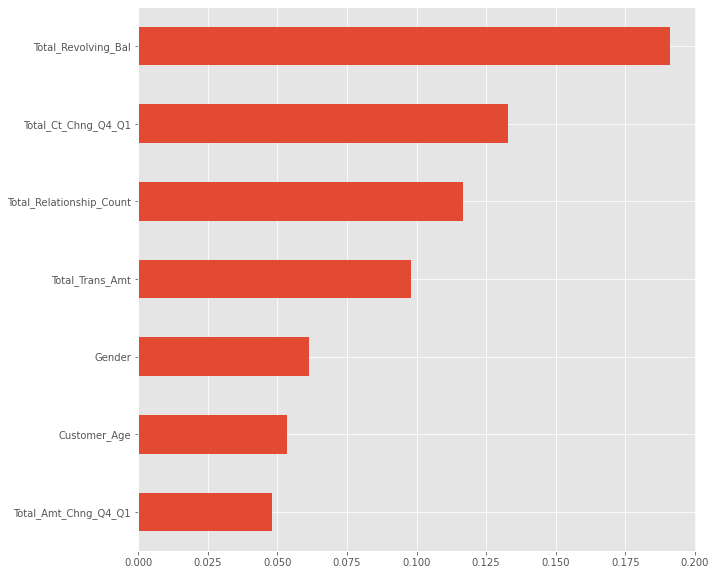

In [ ]:
plt.figure(figsize=(10,10))
importance = pd.Series(result.best_estimator_.feature_importances_,index=df.columns[2:])
importance.nlargest(7).sort_values(ascending=True).plot(kind='barh')

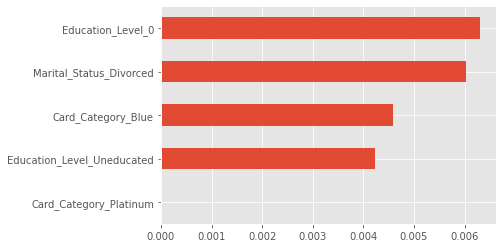

In [ ]:
importance.nsmallest(5).plot(kind='barh')

## XGBoost

In [ ]:
result.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'nthread': 4}

In [ ]:
def predict (model,X_train, X_test, y_train, y_test):
  model.fit(X_train,y_train)
  predict = model.predict(X_test)
  print(classification_report (y_test, predict, target_names=['0', '1']))
  cm = confusion_matrix(y_test,predict,labels=model.classes_,normalize='true')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  disp.plot()

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       465
           1       0.98      0.98      0.98      2574

    accuracy                           0.97      3039
   macro avg       0.94      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039



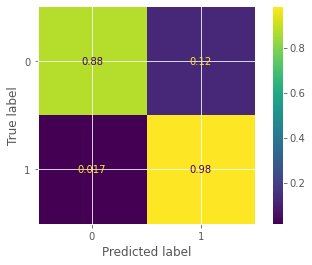

In [ ]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 125, nthread = 4)
predict(model,X_train, X_test, y_train, y_test)

## Delete no importance features

In [ ]:
df.drop(columns=['Card_Category_Platinum'],inplace=True)

In [ ]:
proc = preprocessing(df)
scaler = proc.scaler()
X_train,X_test,y_train,y_test = proc.train_test_split()

(10127, 28) (10127, 1)


In [ ]:
# параметры xgboost
param_dist = {
    'n_estimators':[i for i in range(50,200,25)], #кол-во деревьев
    'max_depth' : [i for i in range (2,10,2)],
    'learning_rate' : [0.1,0.01],
    'nthread' : [4],

}

In [ ]:
model = XGBClassifier()
gs = GridSearchCV(model,param_grid=param_dist,scoring='f1', n_jobs=-1)
result = gs.fit(X_train,y_train)
means = result.cv_results_ ['mean_test_score']


In [ ]:
results.best_params_

## XGBoost

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       465
           1       0.98      0.98      0.98      2574

    accuracy                           0.97      3039
   macro avg       0.94      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039



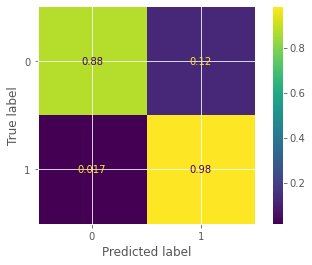

In [ ]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 125, nthread = 4)
predict(model,X_train, X_test, y_train, y_test)